In [1]:
import pandas as pd
from prophet import Prophet
import logging
from prophet.plot import plot_plotly, plot_components_plotly
import pylab as plt
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)
plt.rc('figure', figsize=(30, 20))
fizsize_with_subplots = (20, 20)
bin_size = 5

In [3]:
df = pd.read_csv(r"C:\Users\User\Downloads\archive (2)\daily-minimum-temperatures-in-me.csv")
df.shape

(3647, 2)

In [4]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        3647 non-null   object 
 1   Daily minimum temperatures  3647 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.1+ KB


,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3642,12/27/1990,14.0
3643,12/28/1990,13.6
3644,12/29/1990,13.5
3645,12/30/1990,15.7


In [5]:
df.columns = ['ds','y']
df

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3642,1990-12-27,14.0
3643,1990-12-28,13.6
3644,1990-12-29,13.5
3645,1990-12-30,15.7


In [9]:
fig = px.bar(df, x='ds', y='y')
fig.update_traces(marker_color='green')
fig.show()

In [10]:
logging.getLogger('fbprophet').setLevel(logging.WARNING) 
m = Prophet()
m.fit(df)

15:04:18 - cmdstanpy - INFO - Chain [1] start processing
15:04:18 - cmdstanpy - INFO - Chain [1] done processing


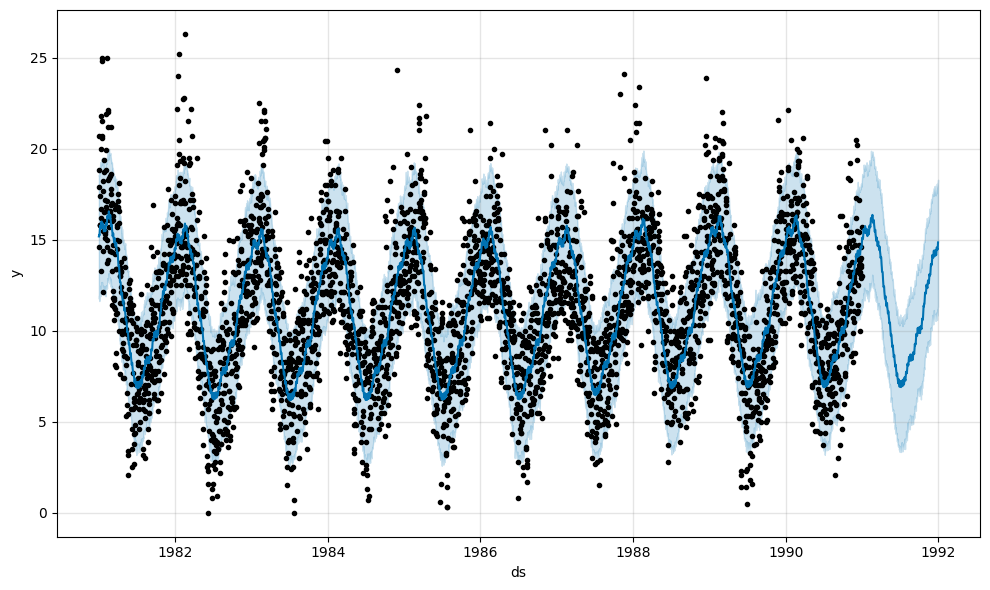

In [11]:
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.head()
fig1 = m.plot(forecast)
plot_plotly(m, forecast)